In [116]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_excel("data.xlsx")
df1 = pd.read_excel("Country-Code.xlsx")
df2 = pd.read_excel("variable description.xlsx")


In [94]:
merged_df = pd.merge(df, df1, on='Country Code')

In [95]:
merged_df.duplicated().sum()

np.int64(0)

In [96]:
merged_df.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [97]:
merged_df.isnull().any(axis = 1).sum()

np.int64(10)

In [98]:
merged_df.dropna(inplace=True)

In [99]:
merged_df.isnull().any(axis = 1).sum()

np.int64(0)

In [100]:
merged_df[:2]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [101]:
merged_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [102]:
# Count the number of restaurants in each city
city_counts = merged_df['City'].value_counts()

# Get the city with the maximum number of restaurants
max_city = city_counts.idxmax()
max_restaurants = city_counts.max()

# Get the city with the minimum number of restaurants
min_city = city_counts.idxmin()
min_restaurants = city_counts.min()

# Display the results
print(f"City with the maximum number of restaurants: {max_city} ({max_restaurants} restaurants)")
print(f"City with the minimum number of restaurants: {min_city} ({min_restaurants} restaurant)")



City with the maximum number of restaurants: New Delhi (5473 restaurants)
City with the minimum number of restaurants: Bandung (1 restaurant)


count    9541.000000
mean        2.665088
std         1.516596
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


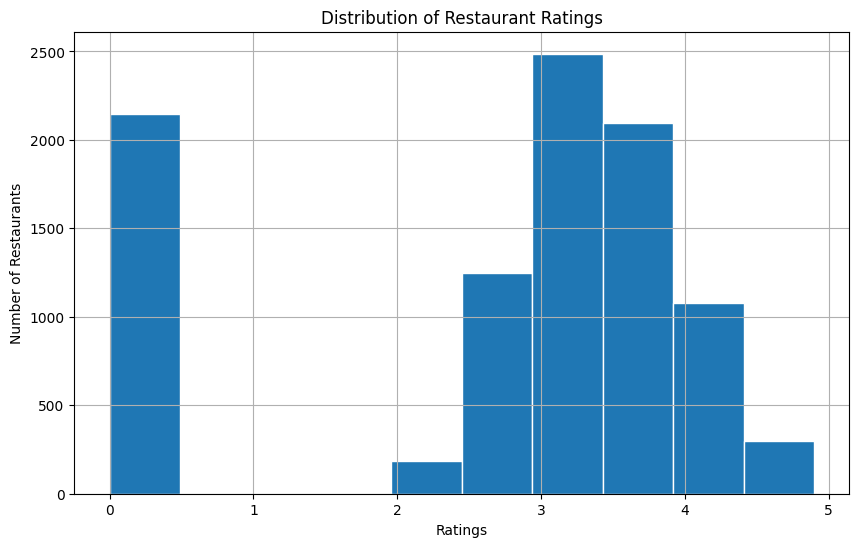

In [103]:

# Get the descriptive statistics of the ratings
rating_stats = merged_df['Aggregate rating'].describe()

# Display the statistics
print(rating_stats)

# Visualize the distribution of ratings using a histogram
plt.figure(figsize=(10,6))
merged_df['Aggregate rating'].dropna().hist(bins=10, edgecolor='white')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Restaurants')
plt.show()


In [104]:

# Group by 'Restaurant Name' and count the number of restaurants for each franchise
franchise_counts = merged_df['Restaurant Name'].value_counts()

# Get the franchise with the most national presence (maximum count)
top_franchise = franchise_counts.idxmax()
top_franchise_count = franchise_counts.max()

print(f"The franchise with the most national presence is: {top_franchise} with {top_franchise_count} locations.")

The franchise with the most national presence is: Cafe Coffee Day with 83 locations.


In [105]:
# Count the number of restaurants that allow table booking (assuming 'Has Table booking' is True/False)
table_booking_counts = merged_df['Has Table booking'].value_counts()

# Calculate the ratio
ratio_of_table_booking=round(table_booking_counts["Yes"]/table_booking_counts["No"],2)

print(f"Restaurants that allow table booking: {table_booking_counts[1]}")
print(f"Restaurants that do not allow table booking: {table_booking_counts[0]}")
print(f"Ratio of restaurants that allow table booking to those that do not: {ratio_of_table_booking}")


Restaurants that allow table booking: 1158
Restaurants that do not allow table booking: 8383
Ratio of restaurants that allow table booking to those that do not: 0.14


In [106]:
# Count the number of restaurants providing online delivery (assuming 'Has Online delivery' is True/Yes or 1)
online_delivery_counts = merged_df['Has Online delivery'].value_counts()

# Calculate the percentage of restaurants providing online delivery
percentage_online_delivery = round((online_delivery_counts['Yes'] / len(merged_df)) * 100, 2)

# Print the results
print(f"Restaurants providing online delivery: {online_delivery_counts['Yes']}")
print(f"Total number of restaurants: {len(merged_df)}")
print(f"Percentage of restaurants providing online delivery: {percentage_online_delivery}%")


Restaurants providing online delivery: 2451
Total number of restaurants: 9541
Percentage of restaurants providing online delivery: 25.69%


In [107]:
# Step 1: Split the cuisines column
cuisines_expanded = merged_df['Cuisines'].str.split(',', expand=True).stack()

# Step 2: Count the occurrences of each cuisine
cuisine_counts = cuisines_expanded.value_counts()

# Step 3: Get the top 10 most common cuisines
top_10_cuisines = cuisine_counts.head(10)

# Print the results
print("Top 10 cuisines served across cities:")
print(top_10_cuisines)


Top 10 cuisines served across cities:
North Indian     2991
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          529
Name: count, dtype: int64


In [108]:
cuisines_expanded = merged_df['Cuisines'].str.split(',', expand=True).stack()
cuisines_expanded

0     0          Italian
      1      Continental
1     0            Asian
      1       Indonesian
      2          Western
               ...      
9548  4          Italian
      5        Beverages
9549  0      Street Food
9550  0          Chinese
      1     North Indian
Length: 19706, dtype: object

In [109]:
# Split the 'Cuisines' column by commas to create a list of cuisines for each restaurant
merged_df['Cuisines List'] = merged_df['Cuisines'].str.split(',')

# Calculate the number of cuisines for each restaurant by measuring the length of the list
merged_df['Num Cuisines'] = merged_df['Cuisines List'].apply(len)

# Calculate the maximum and minimum number of cuisines
max_cuisines = merged_df['Num Cuisines'].max()
min_cuisines = merged_df['Num Cuisines'].min()

print(f"Maximum number of cuisines served by a restaurant: {max_cuisines}")
print(f"Minimum number of cuisines served by a restaurant: {min_cuisines}")


Maximum number of cuisines served by a restaurant: 8
Minimum number of cuisines served by a restaurant: 1


In [110]:
# Calculate the correlation between the number of cuisines and ratings
correlation = merged_df['Num Cuisines'].corr(merged_df['Aggregate rating'])

print(f"Correlation between number of cuisines served and ratings: {correlation}")


Correlation between number of cuisines served and ratings: 0.2501937126441692


In [111]:
merged_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country', 'Cuisines List',
       'Num Cuisines'],
      dtype='object')

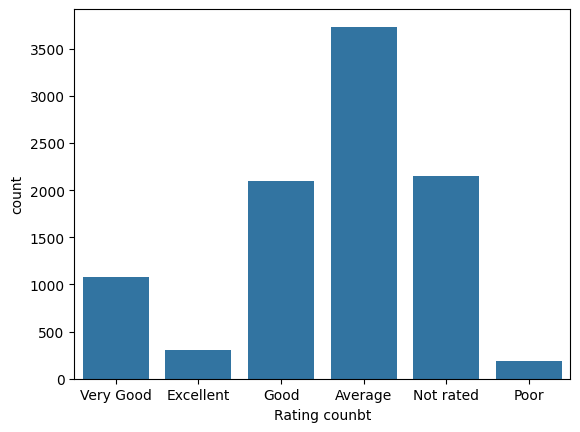

In [112]:
sns.countplot(data = merged_df,x = "Rating text")
plt.xlabel("Rating")
plt.xlabel("Rating counbt")
plt.show()

In [ ]:
correc= merged_df["Aggregate rating"].corr(merged_df["Average Cost for two"])
print(f"Correlation between number of Cost for two and ratings: {correc}")


Correlation between number of cuisines served and ratings: 0.05186896469351653


Restaurant ratings are shaped by various factors that influence customer experience and satisfaction. Here’s what stands out from the analysis:

Menu Variety Matters 🍽️ – Restaurants offering multiple cuisines tend to attract a wider audience, increasing the chances of higher ratings. More options usually mean happier customers!

Price vs. Perception 💰 – Fine dining spots often receive better ratings due to premium service and quality. But budget-friendly places can still score well if they offer great value.

Delivery Convenience 🚚 – Online delivery makes life easier, but ratings depend on factors like food quality after transit and delivery speed.

Table Booking & Experience 📅 – Restaurants that allow table reservations often earn better ratings since they provide a smoother dining experience without long wait times.

Customer Votes & Trust 🗳️ – The more votes a restaurant has, the more reliable its ratings. High engagement often indicates consistency in service and quality.

Location Impact 📍 – Ratings vary by city and country due to different cultural expectations, food preferences, and service standards.

Franchise vs. Hidden Gems 🌟 – Big chains like Cafe Coffee Day have widespread recognition, leading to consistent ratings. Independent restaurants, however, can surprise customers with unique flavors and personalized service.

At the heart of it, ratings reflect customer expectations, convenience, and overall experience. Whether it's a luxury restaurant or a local street food joint, what truly matters is how well they satisfy their customers.